In [1]:
# Copyright (C) 2024 co-pace GmbH (a subsidiary of Continental AG).
# Licensed under the BSD-3-Clause License.
# @author: Jonas Noah Michael Neuhöfer

## Figures

Here we generate the figures used in the paper.

The rendered figures can be found in ``data/figures/``.

In [2]:
%load_ext autoreload
%autoreload 3
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
    
from context import filters, visual, eval

plt.rcParams.update(
    {
        "text.usetex": True,
        "text.latex.preamble": r"\usepackage{amsmath}\usepackage{amsfonts}\usepackage{bm}",
        "pdf.use14corefonts": True,
        
        'font.family': 'serif',
        'font.serif': ['Times'],
    }
)

- Loading package src
-  Loading package src/filters
-  Loading File 'src/utils.py'
-   Loading File 'abstract.py'
-   Loading File 'distributions.py'
-   Loading File 'models.py'
-   Loading File 'proposed.py'
-   Loading File 'robust.py'
-  Loading package src/visual
-  Loading package src/eval
-   Loading File 'simulate.py'
-   Loading File 'Distr_test.py'
-   Loading File 'Singer_test.py'
-   Loading File 'showcase.py'
-   Loading File 'animations.py'


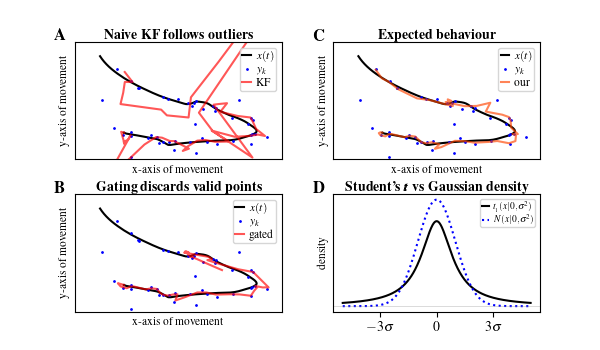

In [3]:
fig = plt.figure(figsize=(6, 3.5))
gs1 = gridspec.GridSpec(3, 3, width_ratios=[1,0.25, 1], height_ratios=[1,0.3,1], wspace=0, hspace=0)
ax1 = np.array([[plt.subplot(gs1[2*i,2*j]) for j in range(2)] for i in range(2)])

seed = eval.simulate.make_seed(0)
skip = 4
model, (x0, P0), (x,y,v,e,t) = eval.simulate.simulate_Singer(seed=seed, beta=0.2, T=200)
y = y[skip::skip,:,:]; t = t[skip::skip]
KF_est,  _ = filters.basic.KalmanFilter(model=model, mean=x0, covar=P0).filter(y,t).get_all_state_distr()
KFG_est, _ = filters.basic.KalmanFilter(model=model, mean=x0, covar=P0, gating=0.99).filter(y,t).get_all_state_distr()
STF_est,  _ = filters.proposed.StudentTFilter(model=model, mean=x0, covar=P0, nu=3).filter(y,t).get_all_state_distr()


for i,j in [(0,0), (1,0), (0,1)]:
    ax1[i,j].plot(x[:,0,0], x[:,1,0], color="black", label="$x(t)$")
    #ax1[i,j].axis('square')
    ax_lim = (ax1[i,j].get_xlim(), ax1[i,j].get_ylim())
    ax1[i,j].plot(y[:,0,0], y[:,1,0], "bo", markersize=1, label="$y_k$")
ax1[0,0].plot(KF_est.mean( )[:,0,0], KF_est.mean( )[:,1,0], color="red", label="KF", alpha=0.66)
ax1[1,0].plot(KFG_est.mean()[:,0,0], KFG_est.mean()[:,1,0], "-", color="red", label="gated", alpha=0.66)
ax1[0,1].plot(STF_est.mean()[:,0,0], STF_est.mean()[:,1,0], color="#ff4500", label="our", alpha=0.66)
for i,j in [(0,0), (1,0), (0,1)]:
    ax1[i,j].legend(loc="upper right", fontsize="small", handlelength=0.75, handletextpad=0.4, borderpad=0.2, labelspacing=0.25)
    ax1[i,j].set_xlim(ax_lim[0][0]-0.1*(ax_lim[0][1]-ax_lim[0][0]), ax_lim[0][1]+0.1*(ax_lim[0][1]-ax_lim[0][0]))
    ax1[i,j].set_ylim(ax_lim[1][0]-0.1*(ax_lim[1][1]-ax_lim[1][0]), ax_lim[1][1]+0.1*(ax_lim[1][1]-ax_lim[1][0]))
    ax1[i,j].set_xticks([], [])
    ax1[i,j].set_yticks([], [])
    ax1[i,j].set_xlabel("x-axis of movement",fontsize="small")
    ax1[i,j].set_ylabel("y-axis of movement",fontsize="small")
ax1[0,0].set_title("\\textbf{Naive KF follows outliers}", fontsize="medium", pad=-0)
ax1[1,0].set_title("\\textbf{Gating discards valid points}", fontsize="medium", pad=-0)
ax1[0,1].set_title("\\textbf{Expected behaviour}", fontsize="medium", pad=-0)

x_dens = np.linspace(-5,5,501)
ST_dens = filters.distributions.StudentTDistribution(mu=np.array([[0]]), P=np.array([[1]]), nu=1).pdf(x_dens[None,None,:]).flatten()
N_dens  = filters.distributions.NormalDistribution(mu=np.array([[0]]), P=np.array([[1]])).pdf(x_dens[None,None,:]).flatten()
ax1[1,1].plot(x_dens, ST_dens/N_dens[50]*14, color="black", label=r"$t_{ {}_{ 1 }\!}(x|0,\!\sigma^2)$")
ax1[1,1].plot(x_dens, N_dens/N_dens[50]*14, "b:", label=r"$N(x|0,\!\sigma^2)$")
ax1[1,1].axhline(0, color="grey", alpha=0.4, linewidth=0.5)
ax1[1,1].legend(loc="upper right", fontsize="x-small", handlelength=0.8, handletextpad=0.4, borderpad=0.2, labelspacing=0.25)
ax1[1,1].set_title("\\textbf{Student's $\\bm{t}$ vs Gaussian density}", fontsize="medium", pad=-0)
ax1[1,1].set_xticks([-3,0,3], [r'$-3\sigma$', r'$0$', r'$3\sigma$'])
ax1[1,1].set_yticks([], [])
ax1[1,1].set_ylabel("density",fontsize="small")

lshift = -0.1
ushift = 1.015
ax1[0,0].text(lshift, ushift, "\\textbf{A}", transform=ax1[0,0].transAxes, size="large")
ax1[1,0].text(lshift, ushift, "\\textbf{B}", transform=ax1[1,0].transAxes, size="large")
ax1[0,1].text(lshift, ushift, "\\textbf{C}", transform=ax1[0,1].transAxes, size="large")
ax1[1,1].text(lshift, ushift, "\\textbf{D}", transform=ax1[1,1].transAxes, size="large")

fig.savefig("../data/figures/explainatory1.pdf", bbox_inches='tight')
fig.savefig("../data/figures/explainatory1.svg", bbox_inches='tight')


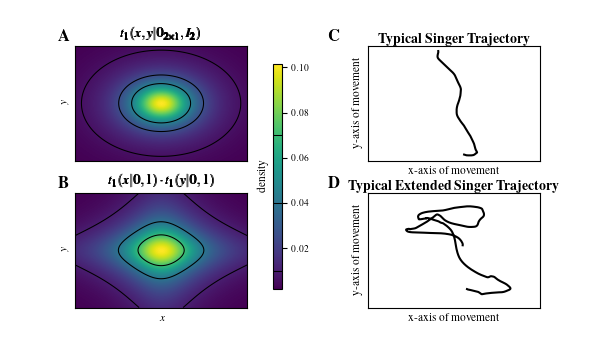

In [4]:

wratios = [1,0.15,0.05, 0.5, 1]; hratios = [1,0.2,1]
whratio = 1.5
fig = plt.figure(figsize=(6, 3.5))
gs2 = gridspec.GridSpec(3, 5, width_ratios=wratios, height_ratios=hratios, wspace=0, hspace=0)
ax2 = np.array([[plt.subplot(gs2[2*i,4*j]) for j in range(2)] for i in range(2)])
cax = plt.subplot(gs2[:,2])
shrink = 1 - (1 - 1/whratio) / 2
cax.set_position([cax.get_position().x0,    cax.get_position().y0 + (1-shrink)/2*cax.get_position().height,
                  cax.get_position().width, cax.get_position().height*shrink])

st0  = filters.distributions.StudentTDistribution(mu=np.array([0]), P=np.array([[1]]), nu=1)
st1  = filters.distributions.StudentTDistribution(mu=np.array([0]), P=np.array([[1]]), nu=1)
joint_st = filters.distributions.Joint_Indep_Distribution.join_distr(st0, st1)
mult_t  = filters.distributions.StudentTDistribution(mu=np.zeros((2,)), P=np.eye(2), nu=1)
step=0.01
dens_lim = 2.5
x2d, y2d = np.mgrid[-dens_lim+step:dens_lim:step, -dens_lim+step:dens_lim:step]
eval_points = np.stack((x2d,y2d),axis=0).reshape((2,-1))
density_st = joint_st.pdf(eval_points).reshape(x2d.shape)
density_mt = mult_t.pdf(eval_points).reshape(x2d.shape)
extent = (whratio*(-dens_lim+step),whratio*(dens_lim-step),-dens_lim+step,dens_lim-step)
ax2[0,0].set_title(r"$\pmb {t_{\pmb  1} ( x,y | 0_{\pmb  {2 \!\times\! 1}},I_{\pmb  2})}$", fontsize="medium")
im_no = ax2[0,0].imshow(density_mt, origin="lower", extent=extent, alpha=1)
cont_no = ax2[0,0].contour(density_mt, levels=[0.01, 0.04, 0.07], colors=["black"], extent=extent,
                           linewidths=0.75, linestyles=["-", "-", "-"], origin="lower")
ax2[0,0].set_xticks([], [])
ax2[0,0].set_yticks([], [])
ax2[0,0].set_ylabel("$y$",fontsize="small")
ax2[1,0].set_title(r"$\pmb{t_{\pmb 1}( x | 0, 1) \cdot t_{\pmb 1}( y | 0, 1)}$", fontsize="medium")
im_st = ax2[1,0].imshow(density_st, origin="lower", extent=extent, alpha=1)
cont_st = ax2[1,0].contour(density_st, levels=[0.01, 0.04, 0.07], colors=["black"], extent=extent,
                           linewidths=0.75, linestyles=["-", "-", "-"], origin="lower")
ax2[1,0].set_xticks([], [])
ax2[1,0].set_yticks([], [])
ax2[1,0].set_xlabel("$x$",fontsize="small")
ax2[1,0].set_ylabel("$y$",fontsize="small")
cbar = plt.colorbar(im_st, cax=cax, anchor=(-1,0.5), shrink=0.2)
cax.set_ylabel("density", fontsize="small")
cax.yaxis.set_label_position('left')
cbar.add_lines(cont_no)
cbar.lines[-1].set_linestyles(cont_no.linestyles)
cbar.ax.yaxis.set_label_position("left")
cbar.ax.tick_params(labelsize="x-small")

#seed = eval.simulate.make_seed("Random but reproducible seed")
model2, (x02, P02), (x2,y2,v2,e2,t2) = eval.simulate.simulate_Singer(seed=seed, beta=0,   T=700)
model3, (x03, P03), (x3,y3,v3,e3,t3) = eval.simulate.simulate_Singer(seed=seed, beta=0.2, T=700)
singer_x = [x2, x3]
for i in range(2):
    ax2[i,1].plot(whratio* singer_x[i][:,0,0], singer_x[i][:,1,0], color="black")
    xlim = ax2[i,1].get_xlim()
    ylim = ax2[i,1].get_ylim()
    ax2[i,1].set_aspect('equal')
    maxd = max( xlim[1]-xlim[0], ylim[1]-ylim[0] )
    ax2[i,1].set_xlim( whratio*(xlim[1]+xlim[0]-maxd)/2, whratio*(xlim[1]+xlim[0]+maxd)/2 )
    ax2[i,1].set_ylim( (ylim[1]+ylim[0]-maxd)/2, (ylim[1]+ylim[0]+maxd)/2 )
    ax2[i,1].set_xticks([], [])
    ax2[i,1].set_yticks([], [])
    ax2[i,1].set_xlabel("x-axis of movement",fontsize="small")
    ax2[i,1].set_ylabel("y-axis of movement",fontsize="small")
ax2[0,1].set_title("\\textbf{Typical Singer Trajectory}", fontsize="medium", pad=-10)
ax2[1,1].set_title("\\textbf{Typical Extended Singer Trajectory}", fontsize="medium", pad=-0)

ax2[0,0].text(-0.1, 1.045, "\\textbf{A}", transform=ax2[0,0].transAxes, size="large")
ax2[1,0].text(-0.1, 1.045, "\\textbf{B}", transform=ax2[1,0].transAxes, size="large")
ax2[0,1].text(-0.23, 1.045, "\\textbf{C}", transform=ax2[0,1].transAxes, size="large")
ax2[1,1].text(-0.23, 1.045, "\\textbf{D}", transform=ax2[1,1].transAxes, size="large")

fig.savefig("../data/figures/explainatory2.pdf", bbox_inches='tight')
fig.savefig("../data/figures/explainatory2.svg", bbox_inches='tight')